#### Setup

In [5]:
import pandas as pd

# Read the data
data = pd.read_csv('melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# using pipelines makes the code simpler - ESPECIALLY FOR CV!!!!
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

### Cross-Validation

Cross-validation is a model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. Cross-validation includes resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations. It is often used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. It can also be used to assess the quality of a fitted model and the stability of its parameters.


#### When to use Cross-Validation?
For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout. There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

In [7]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]
Average MAE score (across experiments):
277707.3795913405


#### For Model Selection

In [8]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.

    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    score = -1 * cross_val_score(pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return score.mean()

Compare different Random-Forest models, where the difference lies in the number of created trees

In [9]:
results = {i: get_score(i) for i in range(50,401,50)}

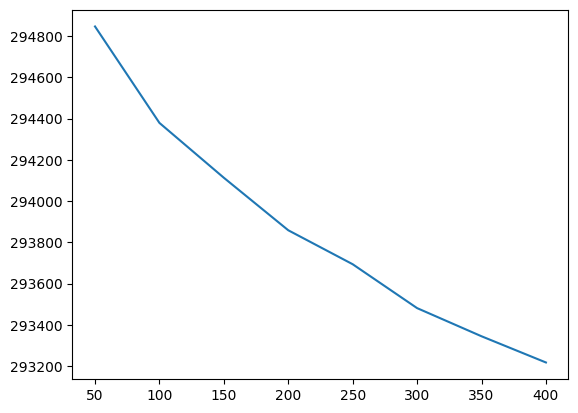

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()